<font size="6">
    <b>微分方程式の数値解法</b>
</font>

<div style="text-align: right;">
python/phys/numerics_diff_eq.ipynb
</div>

# 1階の微分方程式

次式で与えられる微分方程式を考える．
\begin{equation}
\label{eq:Euler}
\frac{dx}{dt} = f(x)
\end{equation}
初期条件は，$t=t_0$で$x=x_0$とする．

## Euler法

式(\ref{eq:Euler})を単純に差分化した式は
\begin{equation}
\label{eq:Euler:dis}
x_{j+1}=x_j+f(x_j) \Delta t
\end{equation}



この式を用いて微分方程式を数値的に解くことができる．この方法をEuler法とよぶ．  
どのようにして計算するかは以下の通り．  
まず，初項はもちろん$x_0$．$x_1$は式(\ref{eq:Euler:dis})で$j=0$とおいて
\begin{equation}\label{eq:}
x_1=x_0+f(x_0) \Delta t
\end{equation}
となる．

以下，同様にして
\begin{equation}
x_2=x_1+f(x_1) \Delta t
\end{equation}
\begin{equation}
x_3=x_2+f(x_2) \Delta t
\end{equation}
\begin{equation}
\vdots
\end{equation}

この計算をパソコンにやってもらう．   
Pythonで書く．

In [1]:
def f(x):
    return -x

ts, te, Nt = 0, 1, 10
dt=(te-ts)/Nt
x=1

for i in range(0,Nt+1):
    t=i*dt        
    print('{0:5.3f}  {1:5.3f}'.format(t,x))
    x+=f(x)*dt
    t+=dt

0.000  1.000
0.100  0.900
0.200  0.810
0.300  0.729
0.400  0.656
0.500  0.590
0.600  0.531
0.700  0.478
0.800  0.430
0.900  0.387
1.000  0.349


数値だけだと味気ないので，グラフを描いてみる．

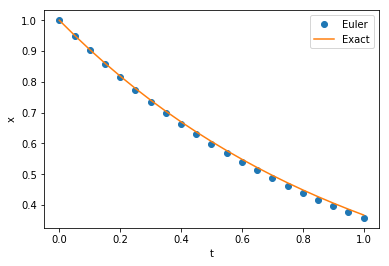

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -x

xa,ta=[],[]
ts,te=0,1
x,t=1,ts
Nt=20
dt=(te-ts)/Nt
for i in range(0,Nt+1):
    xa.append(x)
    ta.append(t)
    t=i*dt        
    x+=f(x)*dt
    t+=dt
    
plt.plot(ta,xa,"o",label='Euler') 
plt.plot(ta,np.exp(-np.array(ta)),label='Exact')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

## 中点法

Euler法だと誤差が大きい．改善した方法が，中点法．

\begin{equation}
\label{eq:Midp1}
x_{m} = x_j + \frac12 f(x_j) \Delta t
\end{equation}
\begin{equation}
\label{eq:Midp2}
x_{j+1} = x_j + f(x_m) \Delta t
\end{equation}

計算する式が1つ増えただけだが，精度は格段に向上する．

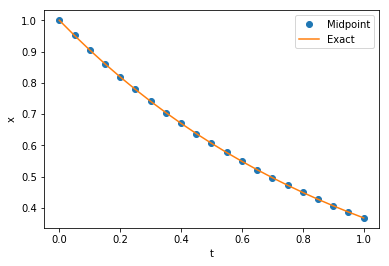

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -x

xa,ta=[],[]
x,t=1,0
Nt=20
ts,te=0,1
dt=(te-ts)/Nt
for i in range(0,Nt+1):
    xa.append(x)
    ta.append(t)
    t=i*dt 
    xm=x+0.5*f(x)*dt    
    x+=f(xm)*dt
    t+=dt
    
plt.plot(ta,xa,"o",label='Midpoint') 
plt.plot(ta,np.exp(-np.array(ta)),label='Exact')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

# 2階の微分方程式

2階の微分方程式
\begin{equation}\label{eq:diffEq2}
\frac{d^2x}{dt^2} = f(x)
\end{equation}
を数値的に解く．

Euler法と中点法で解こう．

## Euler法

まずは簡単なEuler法で解いてみる．  
\begin{equation}
\frac{dx}{dt}=y
\end{equation}
とおくと，式(\ref{eq:diffEq2})より
\begin{equation}
\frac{dy}{dt}=f(x)
\end{equation}


まとめて書くと
\begin{equation}
\label{eq:DiffEq2B}
\frac{d{\bf r}}{dt} = {\bf F}({\bf r})
\end{equation}
ただし
\begin{equation}
{\bf r} = \left( \begin{array}{c} x \\ y \end{array} \right)
\end{equation}
\begin{equation}
{\bf F}({\bf r}) = \left( \begin{array}{c} y \\ f(x) \end{array} \right)
\end{equation}
である．


Euler法を適用すると，次の差分の式を計算すればよいことになる．
\begin{equation}
\label{eq:DiffEq2:dis}
{\bf r}_{j+1}={\bf r}_j + {\bf F}({\bf r}_j) \Delta t
\end{equation}


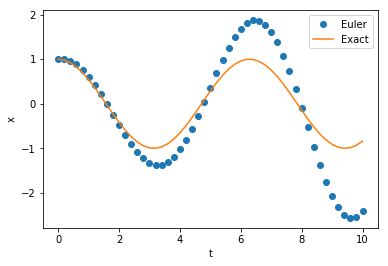

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -x

def F(r):
    return np.array([r[1],f(r[0])])

xa,ta=[],[]
ts,te=0,10
t=ts
Nt=50
dt=(te-ts)/Nt
r=np.array([1,0])
for i in range(0,Nt+1):
    xa.append(r[0])
    ta.append(t)
    t=i*dt        
    r=r+F(r)*dt
    t+=dt
    
plt.plot(ta,xa,"o",label='Euler') 
plt.plot(ta,np.cos(-np.array(ta)),label='Exact')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

出だしのところしか正しくない．

## 中点法

中点法を適用すると，
\begin{equation}
\label{eq:DiffEq2:midp1}
{\bf r}_{m}={\bf r}_j + \frac12 {\bf F}({\bf r}_j) \Delta t
\end{equation}
\begin{equation}
\label{eq:DiffEq2:midp2}
{\bf r}_{j+1}={\bf r}_j + {\bf F}({\bf r}_m) \Delta t
\end{equation}

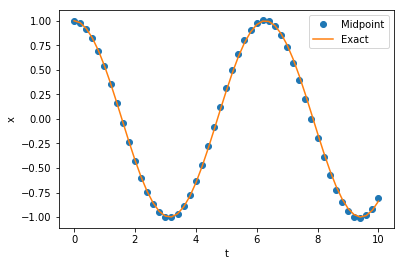

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -x

def F(r):
    return np.array([r[1],f(r[0])])

xa,ta=[],[]
ts,te=0,10
t=ts
Nt=50
dt=(te-ts)/Nt
r=np.array([1,0])
for i in range(0,Nt+1):
    xa.append(r[0])
    ta.append(t)
    t=i*dt        
    rm=r+0.5*F(r)*dt
    r=r+F(rm)*dt
    t+=dt
    
plt.plot(ta,xa,"o",label='Midpoint') 
plt.plot(ta,np.cos(-np.array(ta)),label='Exact')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

数値計算だと，単振り子の場合も簡単に計算できる．  
単振り子の運動方程式は
\begin{equation}
\frac{d^2x}{dt^2} = -\sin x
\end{equation}


上記のPythonのコードで関数$f(x)=-x$としている部分を$f(x)=-\sin(x)$と変更するだけで良い．

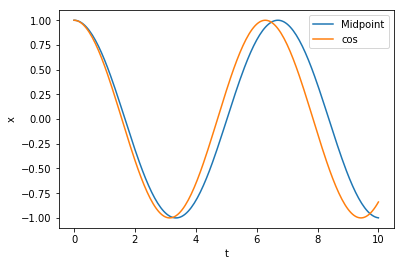

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -np.sin(x)

def F(r):
    return np.array([r[1],f(r[0])])

xa,ta=[],[]
ts,te=0,10
t=ts
Nt=200
dt=(te-ts)/Nt
r=np.array([1,0])
for i in range(0,Nt+1):
    xa.append(r[0])
    ta.append(t)
    t=i*dt        
    rm=r+0.5*F(r)*dt
    r=r+F(rm)*dt
    t+=dt
    
#plt.plot(ta,xa,"o",label='Midpoint') 
plt.plot(ta,xa,label='Midpoint') 
plt.plot(ta,np.cos(-np.array(ta)),label='cos')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

$\sin x = x - x^3/3! + ...$だから， $-\sin x \simeq -x$ と近似した場合と比較して，復元力が弱くなるため周期が長くなる．